# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\user\AppData\Local\Temp\ipykernel_20460\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [3]:
# Q1
pd.set_option('display.max_columns', None)
display(df.head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [4]:
# Q2 - 우선 데이터프레임의 정보를 확인해본다
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [5]:
# Q2 - 결측치를 count하고, 행의 개수 len(df)로 나눠서 결측치 비율도 함께 계산한다. 

missing_values = df.isnull().sum()
missing_values_percent = ((missing_values / len(df)) * 100).round(1)
missing_data = pd.concat([missing_values, missing_values_percent], axis=1)
missing_data.columns = ['missing_num', 'missing_%']
missing_data = missing_data[missing_data['missing_num'] > 0]
missing_data = missing_data.sort_values(by='missing_num', ascending=False)
display(missing_data)

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

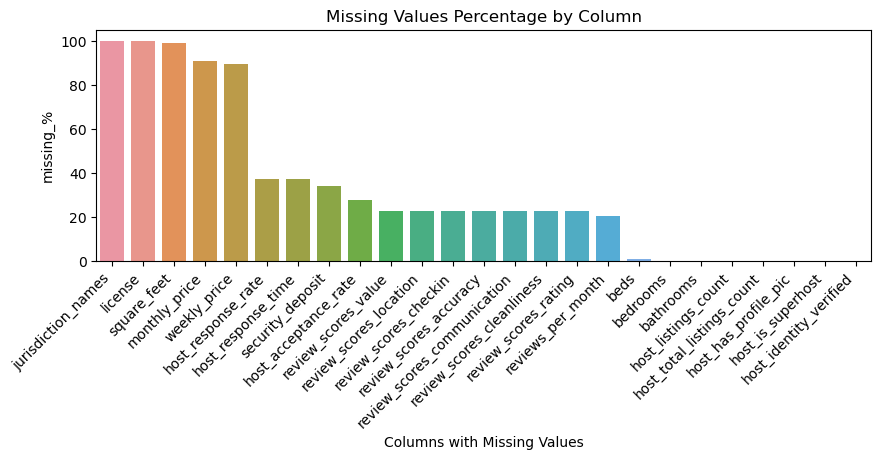

In [6]:
# Q3
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 3))
sns.barplot(x=missing_data.index, y=missing_data['missing_%'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns with Missing Values')
plt.ylabel('missing_%')
plt.title('Missing Values Percentage by Column')
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [7]:
# Q4
beds_missing_df = df[df['beds'].isnull()]
display(beds_missing_df.head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [8]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [9]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

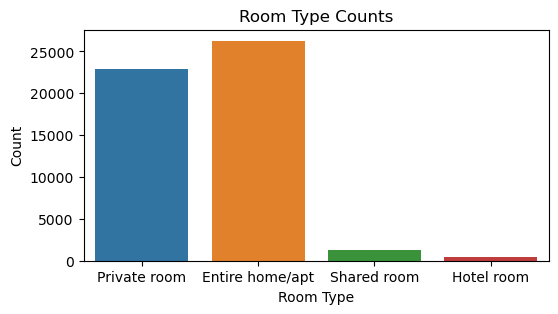

In [16]:
# Q5
plt.figure(figsize=(6, 3))
# countplot: 범주형 변수 x의 각 카테고리별 개수를 확인한다.
sns.countplot(data=df, x='room_type')

plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Counts')
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

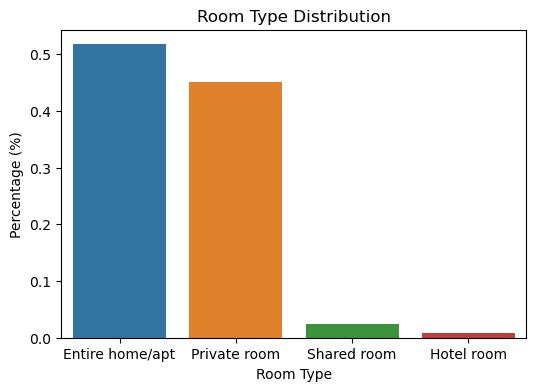

In [17]:
# Q6

plt.figure(figsize=(6, 4))
room_type_counts = df['room_type'].value_counts(normalize=True)
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Percentage (%)')
plt.title('Room Type Distribution')
plt.xticks(rotation=0)
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

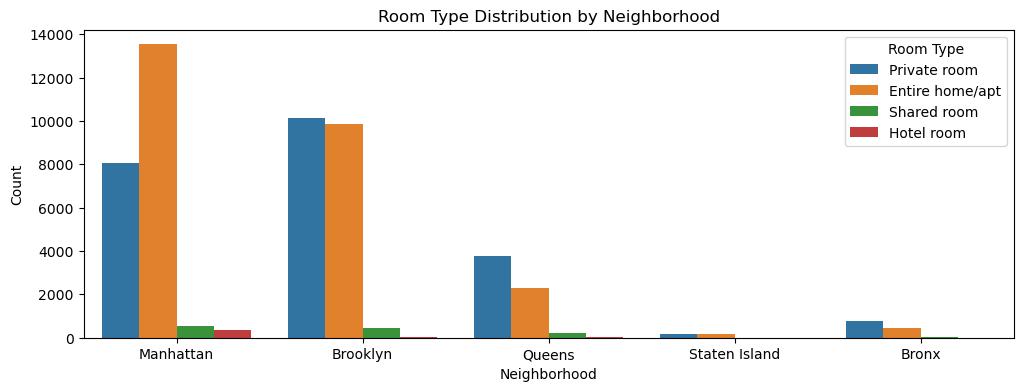

In [18]:
# Q7
plt.figure(figsize=(12, 4))
sns.countplot(x='neighborhood', hue='room_type', data=df)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Room Type Distribution by Neighborhood')
plt.legend(title='Room Type')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

C:\Users\user\AppData\Local\Temp\ipykernel_20460\2135939567.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='neighborhood', y='price', data=df, palette='bright')


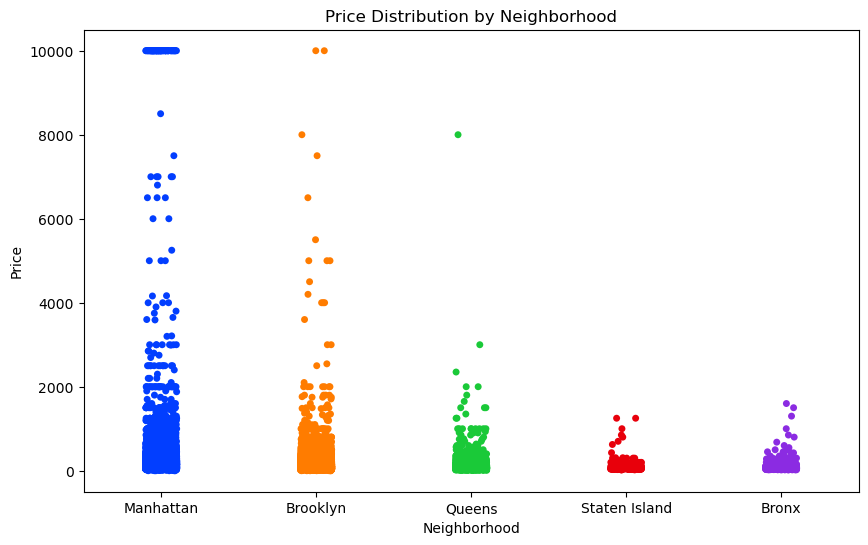

In [22]:
# Q8
plt.figure(figsize=(10, 6))
sns.stripplot(x='neighborhood', y='price', data=df, palette='bright')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood')

plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

* Q5 그래프를 통해 범주형 특성 'room_type'의 종류별 값의 개수를, Q6 그래프를 통해 비율 (점유율)을 알 수 있었다. 
방 종류는 private room, entire home/apt, shared room, hotel room의 4가지 범주로 나뉘고 그중 entire home/apt가 가장 많으며, private room이 그 다음, 나머지 둘은 그에 비해 굉장히 적은 비율을 차지한다.
* Q7을 통해 지역별, 방 타입 별 개수를 알 수 있었고, Q8 그래프를 통해 지역별 가격 분포를 알 수 있었다. 


<결론>
* 대부분의 숙소는 맨해튼, 브루클린에 집중되어 있다. 특히 맨해튼이 브루클린보다도 훨씬 숙소가 많은데, 참고로 각 지역의 면적까지 고려하면 숙소의 밀집도 또한 굉장히 높다는 것을 알 수 있다. (추후 위도 경도 자료를 통해 밀집도 역시 확인할 수 있을듯)
* 숙소 유형을 보았을 때 private room, entire home/apt이 많다. shared room을 선호하지 않는 것으로 추정된다.
* 방의 유형별 개수와 지역별 방 유형 개수 그래프를 비교해 보았을 때, (Q6과 Q7) 다른 지역에서는 private room이 가장 많이 존재하는 것에 반해 맨해튼에서만 entire home/apt가 더 많았다. 그리고 전체 비율을 봤을 때 entire home/apt가 더 많았으므로 맨해튼에 존재하는 entire home/apt의 수가 다른 지역에 비해 훨씬 많다는 것을 두 그래프를 통해 서로 확인할 수 있었다.
* 맨해튼은 전반적으로 집값이 더 높은 지역임을 유추할 수 있다. Q8의 그래프에서 $3000 이상~ $10000까지의 범위에 더 많은 점이 분포해 있기 때문에 다른 지역에 비해 비싼 집이 꽤 많다는 것을 시각적으로 확인 가능하다. 반면 queens, staten, bronx는 방 개수도 적고 방값이 싸다.

<과제 외 추가>
* 추가로 위에서 보았던 속성 (room type, price, neighbor) 3가지의 관계를 더 확인하고자 만들어서 참고했습니다.
* 맨해튼의 가격분포 그래프를 조금 더 살펴보았을 때 평균적인 가격은 'Entire home/apt'가 'private room'보다 비쌀 것으로 추측했다. 다만 추측일 뿐 최고가인 $10000의 방의 유형이 어떤 것이고 방 유형별로 가격분포가 어떠한지 등의 구체적 정보는 Q8그래프 만으로는 정확히 알 수 없다. 또 방 유형의 특성상 오히려 초고가의 방은 private, hotel 등의 유형일 수 있다. 그러나 전반적인 방의 개수를 참고했을 때 entire home/apt가 더 price가 높은 중고가의 방들이 많이 몰려있지 않을까 라는 추측에 추가로 다른 그래프를 만들어서 확인해보았다.

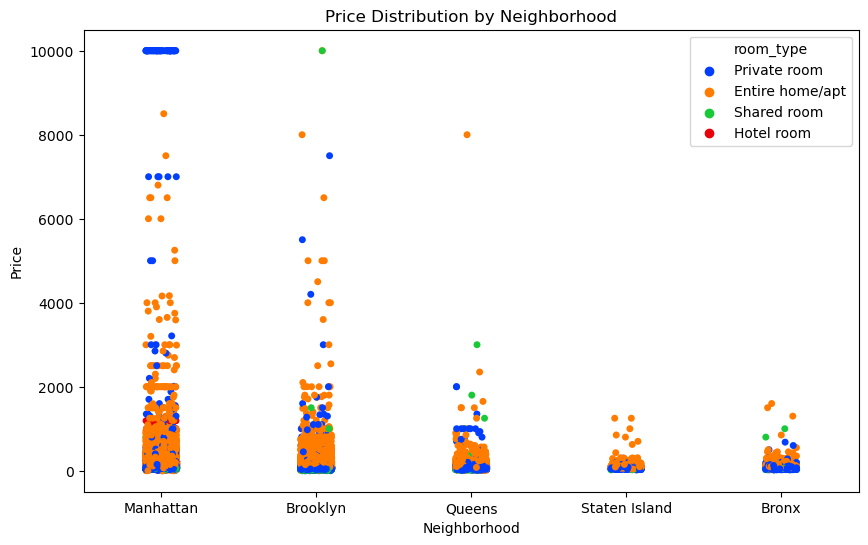

In [24]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='neighborhood', y='price', hue='room_type', data=df, palette='bright')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood')

plt.show()

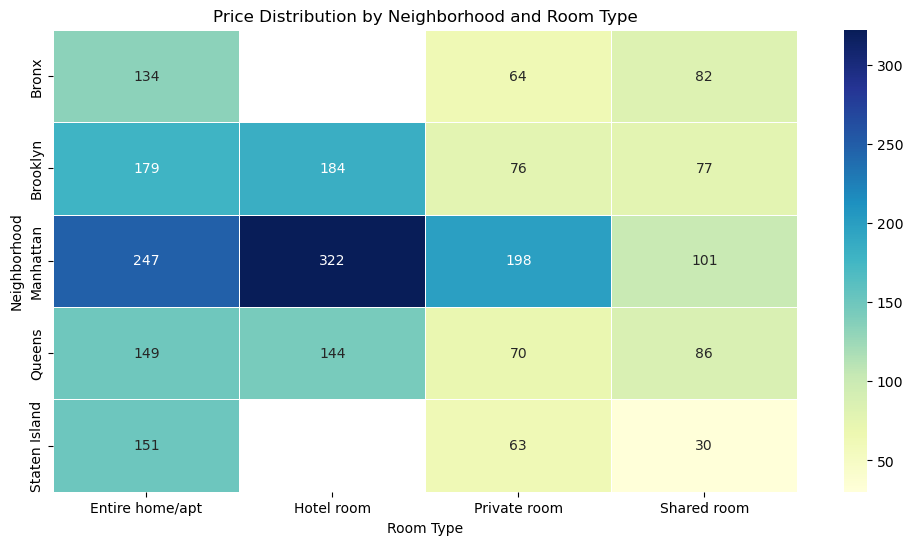

In [25]:
# pivot_table을 사용하여 지역과 방의 종류에 따른 가격의 평균값 테이블을 생성
heatmap_data = df.pivot_table(index='neighborhood', columns='room_type', values='price', aggfunc='mean')

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.title('Price Distribution by Neighborhood and Room Type')

plt.show()

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

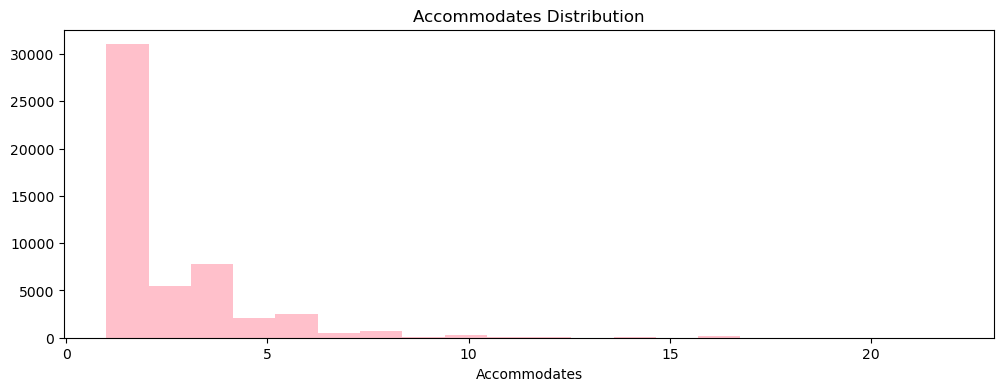

In [60]:
# Q10

plt.figure(figsize=(12, 4))
plt.hist(df['accommodates'], bins=20, color='pink')
plt.xlabel('Accommodates')
plt.title('Accommodates Distribution')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

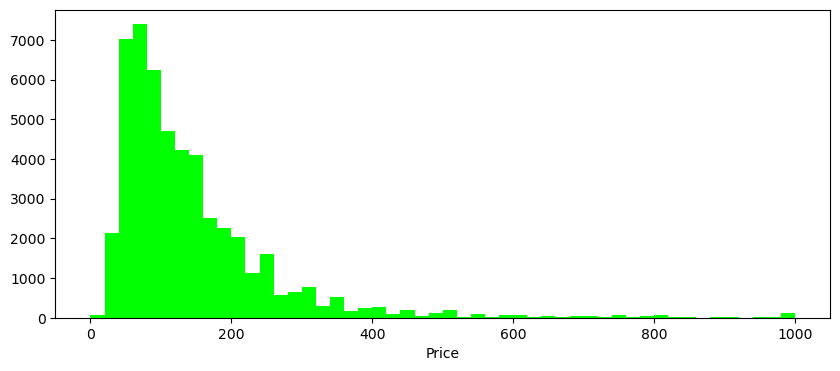

In [49]:
# Q11
plt.figure(figsize=(10, 4))
plt.hist(df['price'], bins=50, range=(0, 1000), color='lime')
plt.xlabel('Price')
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [3]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\user\AppData\Local\Temp\ipykernel_20980\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [5]:
missing_num = df.isnull().sum().sort_values(ascending=False)
missing_ratio = missing_num/len(df)
missing_info = pd.concat([missing_num,missing_ratio],axis=1,keys=['missing_number','missing_ratio'])

In [6]:
df = df.drop(columns=missing_ratio[missing_ratio >= 0.25].index)

In [50]:
# df[].dropna() - 특정 열 대상으로 결측 값 있으면 행 제거 (axis=0)
for col in df.columns:
    missing_ratio = df[col].isnull().sum() / len(df)
    if 0.1 <= missing_ratio < 0.25:
        df = df.dropna(subset=[col], axis=0)
for col in df.columns:
    missing_ratio = df[col].isnull().sum() / len(df)
    if 0.1 <= missing_ratio < 0.25:
        df = df.dropna(subset=[col], axis=0)
    if 0 < missing_ratio < 0.1 and df[col].dtype != 'object':
        median = df[col].median()
        df[col].fillna(median, inplace=True)

df.reset_index(drop=True, inplace=True)

In [9]:
# 나머지 결측치는 최빈값으로 대체
mode_values = {
    'host_is_superhost': df['host_is_superhost'].mode().iloc[0],
    'host_has_profile_pic': df['host_has_profile_pic'].mode().iloc[0],
    'host_identity_verified': df['host_identity_verified'].mode().iloc[0]
}

df = df.fillna(mode_values)

In [11]:
null_columns = df.columns[df.isnull().any()]
print("Null 값이 존재하는 열:", null_columns)
# null 값이 없다.

Null 값이 존재하는 열: Index([], dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39365 entries, 0 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39365 non-null  int64  
 1   host_is_superhost                 39365 non-null  object 
 2   host_listings_count               39365 non-null  float64
 3   host_total_listings_count         39365 non-null  float64
 4   host_verifications                39365 non-null  object 
 5   host_has_profile_pic              39365 non-null  object 
 6   host_identity_verified            39365 non-null  object 
 7   neighborhood                      39365 non-null  object 
 8   latitude                          39365 non-null  float64
 9   longitude                         39365 non-null  float64
 10  is_location_exact                 39365 non-null  object 
 11  property_type                     39365 non-null  object 
 12  room

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


# 1. 라벨 인코딩 (Label Encoding)

이진형 데이터를 0과 1로 변환하여 숫자로 표현 가능하다. 머신러닝 알고리즘에서 문자열을 직접 처리하지 못할 경우 유용할 수 있다.

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

In [43]:
#Q13-1)

df['host_is_superhost_encoded'] = label_encoder.fit_transform(df['host_is_superhost'])
df['host_has_profile_pic_encoded'] = label_encoder.fit_transform(df['host_has_profile_pic'])
df['is_location_exact_encoded'] = label_encoder.fit_transform(df['is_location_exact'])

In [45]:
# df.host_is_superhost_encoded.value_counts()

0    29964
1     9401
Name: host_is_superhost_encoded, dtype: int64

# 2. 원-핫 인코딩 (One-Hot Encoding)
**'cancellation_policy'**, 취소정책은 **flexible, moderate, strict** 등으로 나뉘는 범주형 자료이다. 범주형 자료는 수치가 아니기 때문에, 기계학습 진행 시 특성과 타깃 간의 상관관계를 파악하기 어려워 해당 특성의 중요도가 떨어질 가능성이 있다. 그러나 소비자들이 에어비앤비 결제를 결정하는 것에 있어서 취소 정책은 매우 중요한 고려사항이라고 생각한다. 그렇기 때문에 특성으로 잘 고려해줄 수 있도록 원-핫 인코딩을 진행했다. 하지만 범주 (카테고리 개수)가 너무 많으면 너무 많은 특성이 발생하고 복잡해진다는 문제가 있다. 여기서는 6개의 열이 추가로 생기기 때문에 그냥 진행해도 된다고 생각하지만, 빈도수가 적은 strict, super_strict 2가지를 기타 'strict'로 묶거나 strict_14_with_grace_period와 병합해도 범주가 3가지로 줄기 때문에 괜찮다고 생각하였다.

In [25]:
df['cancellation_policy'].value_counts()

strict_14_with_grace_period    19931
moderate                       10172
flexible                        9205
strict                            22
super_strict_30                   22
super_strict_60                   13
Name: cancellation_policy, dtype: int64

In [47]:
df_encoded = df.copy()

# 'strict', 'super_strict_30', 'super_strict_60'를 'strict_etc'로 묶기 (복사본에서만)
df_encoded['cancellation_policy'] = df_encoded['cancellation_policy'].replace(['strict', 'super_strict_30', 'super_strict_60'], 'strict_etc')

# LabelEncoder를 사용하여 범주형 데이터를 숫자형으로 변환
df_encoded['cancellation_encoded'] = label_encoder.fit_transform(df_encoded['cancellation_policy'])

# OneHotEncoder를 사용하여 원핫인코딩 적용
cancellation_onehot_encoded = onehot_encoder.fit_transform(df_encoded['cancellation_encoded'].values.reshape(-1, 1)).toarray()

cancellation_encoded_df = pd.DataFrame(cancellation_onehot_encoded, columns=['flexible', 'moderate', 'strict_14_with_grace_period', 'strict_etc'])
df = pd.concat([df, cancellation_encoded_df], axis=1)

# 결과 확인
display(df[['flexible', 'moderate', 'strict_14_with_grace_period', 'strict_etc']].head())

,flexible,moderate,strict_14_with_grace_period,strict_etc
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


# 3. price 열 - 범주화, 특성 추가

가격 카테고리를 저가, 중가, 고가로 나누어 카테고리화 하였다.
또 가격을 활용한 새로운 칼럼을 계산하여 추가하였다. price는 중요한 결정지표이나 수용인원에 따라, 또는 방의 개수에 따라 인원당 부담하는 가격, 침실당 가격 등으로 나눠볼 수도 있다고 생각하였기 때문이다.

In [61]:
# 가격을 저렴, 중간, 고로 나누는 기준 설정
bins = [0, 250, 500, 1000, 5000, float('inf')]
labels = ['very cheap', 'cheap', 'middle', 'high', 'super high']

# 가격을 범주화하여 새로운 열 추가
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
df.price_category.value_counts()

very cheap    28914
cheap          2827
middle          443
high            107
super high       22
Name: price_category, dtype: int64

In [62]:
df['price_per_person'] = df['price'] / df['accommodates']
df['price_per_bedroom'] = df['price'] / df['bedrooms']

In [63]:
pd.set_option('display.max_columns', None)
df

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_is_superhost_encoded,host_has_profile_pic_encoded,is_location_exact_encoded,price_category,flexible,moderate,strict_14_with_grace_period,strict_etc,price_per_person,price_per_bedroom
0,2060.0,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2.0,1.0,1.0,2.0,Real Bed,"{Internet,Wifi}",100.0,1.0,$0.00,1.0,730.0,t,30.0,60.0,90.0,365.0,1.0,0.0,80.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,flexible,f,f,0.01,0.0,1.0,1.0,very cheap,1.0,0.0,0.0,0.0,50.000000,100.0
1,2595.0,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2.0,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225.0,1.0,$0.00,7.0,1125.0,t,4.0,34.0,64.0,339.0,48.0,5.0,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38,0.0,1.0,0.0,very cheap,0.0,0.0,1.0,0.0,112.500000,inf
2,3831.0,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3.0,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89.0,1.0,$0.00,1.0,730.0,t,6.0,10.0,13.0,151.0,313.0,69.0,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71,0.0,1.0,1.0,very cheap,0.0,1.0,0.0,0.0,29.666667,89.0
3,5099.0,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,2.0,$100.00,3.0,21.0,t,0.0,0.0,0.0,0.0,78.0,8.0,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59,0.0,1.0,0.0,very cheap,0.0,1.0,0.0,0.0,100.000000,200.0
4,5114.0,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94.0,1.0,$13.00,1.0,730.0,t,30.0,60.0,90.0,109.0,75.0,0.0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56,0.0,1.0,1.0,very cheap,0.0,0.0,1.0,0.0,47.000000,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32308,35933715.0,f,0.0,0.0,"['email', 'phone']",t,f,Queens,40.75640,-73.92101,t,Condominium,Private room,2.0,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Breakfast,""Smoke detector"",Essen...",85.0,1.0,$0.00,3.0,1125.0,t,0.0,12.0,42.0,317.0,1.0,1.0,100.0,6.0,10.0,10.0,10.0,10.0,8.0,f,f,f,flexible,f,f,0.13,0.0,1.0,1.0,very cheap,0.0,1.0,0.0,0.0,42.500000,85.0
32309,35934018.0,t,0.0,0.0,"['email', 'phone']",t,f,Queens,40.70577,-73.81539,t,Apartment,Entire home/apt,6.0,1.0,1.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Free street parki...",105.0,1.0,$15.00,1.0,1125.0,t,20.0,35.0,49.0,198.0,33.0,33.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0,f,t,f,strict_14_with_grace_period,f,f,3.79,1.0,1.0,1.0,very cheap,1.0,0.0,0.0,0.0,17.500000,105.0
32310,35934279.0,t,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Brooklyn,40.71606,-73.94367,t,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",250.0,1.0,$0.00,365.0,1125.0,t,17.0,17.0,28.0

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
